<a href="https://colab.research.google.com/github/AntsaHoneywinner/TwistChallengeModule3/blob/main/Education_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How important is education in Africa?
## Insight from the Gdelt 2.0 

[GitHub link is here.](https://github.com/AntsaHoneywinner/TwistChallengeModule3/)

### The challenge:  How much news in Africa is on education each year?


   



### 1 - Setting up Bigquery and Google Drive in Colab

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [1]:
# mounting my google drive to access my files

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
ls gdrive/MyDrive/TwistChallengeModule3/'my data'

africa.geo.json  allnewsafrica.csv


### Architecture :


[to edit the diagram](https://lucid.app/lucidchart/639ad72b-6f50-4481-87e5-b6b839577e64/edit?invitationId=inv_b95acbb9-c21e-424a-873f-38f7fec6cc47&page=0_0#)



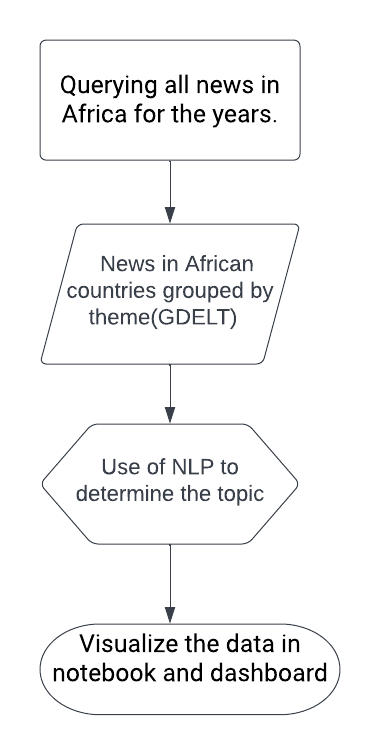

#### Tools for the visualization 

Check
[this ](https://medium.com/geekculture/three-ways-to-plot-choropleth-map-using-python-f53799a3e623) and [this](https://holoviews.org/gallery/demos/bokeh/texas_choropleth_example.html#demos-bokeh-gallery-texas-choropleth-example).


For the [Geojson go here.](https://geojson-maps.ash.ms/)

For accessing the database [go here.](https://www.kaggle.com/code/chasset/load-gdelt-data-with-bigquery)


My own [copy of it](https://www.kaggle.com/code/antsarakotondrafara/load-gdelt-data-with-bigquery/edit).

The list of all themes of GDELT is found [here](http://data.gdeltproject.org/api/v2/guides/LOOKUP-GKGTHEMES.TXT).

Timeline :


4/16/2022 : Load all the data from bigquery to my google drive

4/17/2022 : Come up with the NLP to determine the topic

4/18/2022 : Come up with the visualization.

I followed this [YouTube video](https://www.youtube.com/watch?v=iolQX4XJN2A) and this [pretty notebook](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=SeTJb51SKs_W) to access Bigquery on Colab.

In [ ]:
# # installing the Google Bigquery library
# !pip install --upgrade google-cloud-bigquery

In [ ]:
# !pip install google.cloud

### Importing required libraries

In [5]:
import pandas as pd
from google.cloud import bigquery
import csv
from plotly import graph_objects as go

#variables
project_id = 'twist-challenge-module-3'
#connections
client = bigquery.Client(project=project_id)
# result to dataframe function
def querytodf(query, csvname) :
  '''This function take as input the query, put the result into a csv file and return the dataset'''
  df = pd.io.gbq.read_gbq(query, project_id=project_id, dialect='standard')

  print(df.head())
  dfcsv = df.to_csv(csvname)
  return df 

Now that we see the querying works here, we are going to query all news in African country from 2012 to 2022 and we will group those by country and theme.

I will use this function to make my query.

In [6]:
 def makequery(country,year  ) :
    '''This function take as input a country and a year and return the query to send to bigquery'''
    return('''SELECT
    '''+ "'" + country +'''' AS country,
    '''+ "'" + year +'''' AS year,
    REGEXP_REPLACE(theme , r',.*', " ") AS theme,
    COUNT(*) AS count,
  FROM
    `gdelt-bq.gdeltv2.gkg`,
    UNNEST(SPLIT(V2Themes,';')) AS theme
  WHERE
    DATE> ''' +year+ '''0101000000
    AND DATE < ''' +year+ '''1231000000
    AND Locations LIKE '%'''+country +'''%' 
  GROUP BY
    theme
  ORDER BY
    4 DESC''')

In [11]:
cd gdrive/MyDrive/TwistChallengeModule3/'my data'

/content/gdrive/MyDrive/TwistChallengeModule3/my data


In [13]:
#@markdown For you to select the country { run: "auto" }

country = "Botswana" #@param ["Madagascar", "South Africa", "Ghana","Burundi",'Botswana','Nigeria', 'Zambia', 'Mauritius']
print(makequery(country, '2022' ))


SELECT
   'Botswana' AS country,
   '2022' AS year,
   REGEXP_REPLACE(theme , r',.*', " ") AS theme,
   COUNT(*) AS count,
 FROM
   `gdelt-bq.gdeltv2.gkg`,
   UNNEST(SPLIT(V2Themes,';')) AS theme
 WHERE
   DATE> 20220101000000
   AND DATE < 20221231000000
   AND Locations LIKE '%Botswana%' 
 GROUP BY
   theme
 ORDER BY
   4 DESC


In [9]:
countries = ["Madagascar", "South Africa", "Ghana","Burundi",'Botswana','Nigeria', 'Zambia', 'Mauritius']
years = [ str(2010+i) for i in range(13)]
queryallnews = ''
for i in range(len(countries)) :
  for year in years :
     if i == 0 :
       queryallnews =  makequery(countries[i],year)
     else : 
       queryallnews   = ' (' +  makequery(countries[i], year)+')' + 'UNION ALL ('+  queryallnews + ')'
     
#print(queryallnews)

The following cell is running only onle, for me to query teh dataset and put it into my google drive as csv file. 

In [ ]:
#all_news = querytodf(query = queryallnews, csvname = 'allnewsafrica.csv')

      country  year                       theme  count
0  Madagascar  2022           WB_135_TRANSPORT    6427
1  Madagascar  2022      TAX_RELIGION_ATHEISTS       3
2  Madagascar  2022       TAX_FNCACT_GARDENERS      11
3  Madagascar  2022   WB_1793_HAZARDOUS_WASTES       5
4  Madagascar  2022  TAX_WORLDLANGUAGES_THURIS       3


In [ ]:
ls

africa.geo.json  allnewsafrica.csv


We are not querying anymore this dataset but load it directly from our google drive.

In [12]:
all_news = pd.read_csv('allnewsafrica.csv')

In [ ]:
all_news.head()

,Unnamed: 0,country,year,theme,count
0,0,Madagascar,2022,WB_135_TRANSPORT,6427
1,1,Madagascar,2022,TAX_RELIGION_ATHEISTS,3
2,2,Madagascar,2022,TAX_FNCACT_GARDENERS,11
3,3,Madagascar,2022,WB_1793_HAZARDOUS_WASTES,5
4,4,Madagascar,2022,TAX_WORLDLANGUAGES_THURIS,3


In [ ]:
len(all_news.index)

620501

In [ ]:
print(all_news.theme.unique())

['WB_135_TRANSPORT ' 'TAX_RELIGION_ATHEISTS ' 'TAX_FNCACT_GARDENERS ' ...
 'TAX_WORLDBIRDS_BRIDLED_WHITEEYE '
 'TAX_WORLDMAMMALS_STRIPENECKED_MONGOOSE '
 'TAX_WORLDBIRDS_JAPANESE_WHITE_EYE ']


In [ ]:
theme = 'EDUCATION'
def istheme_in(myrow) :
  try :
    if theme in myrow :
      return True
  except : return False
  return False

### What is the topic ?

Here, I am regrouping all news in major topic : EDUCATION, RELIGION, TRANSPORT, ENVIRONMENT, SOCIAL, ECONOMIC, POLITIC, INFORMATION_AND_COMMUNICATION, HEALTH, JUSTICE, SCIENCE. For that I saw that there are a lot of possible themes in GDELT so I use a pretrained models to determine under which topic each theme falls into.

In [ ]:
year = 2022
theme = 'EDUCATION'
newdf = all_news.loc[(all_news['year'] == year)& all_news['theme'].apply(istheme_in) ]
newdf.head()

,Unnamed: 0,country,year,theme,count
231,231,Madagascar,2022,WB_1484_EDUCATION_SKILLS_DEVELOPMENT_AND_LABOR...,1154
288,288,Madagascar,2022,WB_2141_EDUCATION_DISTRICTS,13
514,514,Madagascar,2022,WB_2147_EDUCATION_RESEARCH_AND_DEVELOPMENT,2
727,727,Madagascar,2022,WB_1513_EDUCATION_POLICY_AND_PLANNING,3
980,980,Madagascar,2022,WB_470_EDUCATION,3472


In [ ]:
def determine_topic(theme):
  '''This function take as input the GDELT theme and return the topic'''
  list_topic = ['EDUCATION', 'RELIGION', 'TRANSPORT', 'ENVIRONMENT', 'SOCIAL', 'ECONOMIC', 'POLITIC', 'INFORMATION_AND_COMMUNICATION', 'HEALTH', 'JUSTICE', 'SCIENCE']
  try :
    for topic in topic :
      if topic in theme : 
        return(topic)
      else : 
        predict(theme)
  except :
    return 'OTHER'


### Grouping the news by the topic and dropping out the time. For each topic taking the percentage of the topic this year.

### Creating smaller datasets  for the visualization.

### Visualization of the final dataset :      

Here, you can visualize the dataset via Choroplet. Choose your topic of interest and the year, then run the cell. 

#### Single topic

In [ ]:
#@markdown For you to select the theme and year { run: "auto" }

topic = "RELIGION" #@param ["TRANSPORT", "RELIGION", "EDUCATION"]
year = "2012" #@param [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

#Create figure object 




fig = go.Figure(
    go.Choroplethmapbox(
        geojson = 'africa.geo.json', #Assign geojson file
        featureidkey = "properties.COUNTYNAME", #Assign feature key
        locations = Dataset["country"], #Assign location data
        z = Dataset["count"], #Assign information data
        zauto = True,
        colorscale = 'viridis',
        showscale = True,
    )
)


#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 6, #Zoom in scale
    mapbox_center = {"lat": 23.9, "lon": 121.52}, #Center location of the map
)

#### Side by Side with education